# Introduction 😃😃


## Car Prices Poland 😃❤️😃

-Predict sale prices for cars in Poland  🙄🙄

The dataset was assembled in January 2022. Data from a well-known car sale site in Poland (which is public). Selenium and request were used for parsing (python of course)

The dataset contains information about the make, model, generation, year of production, mileage, engine type and volume, localization and price



## Mission 🙄🙄

- Predict sale prices for cars in Poland 🙄🙄🙄



# Work plan ❤️

- Analyze and explore data 🤝 
- Building a Machine Learning Model 🤝



# 1- Analyze and Explore DataSet 😃


In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS


In [2]:
#Importing the dataset
df=pd.read_csv("../Car_Prices_Poland_Kaggle.csv")

# look the data set
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [3]:
# looking the shape DataSet
df.shape

(117927, 11)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


In [5]:
#checking null value 
df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

- a lot of missing value at generation name column , I will drop this colume and colume Unnamed: 0 I don`t using this colume with my analysis

In [6]:
df.drop(columns=["generation_name","Unnamed: 0"],inplace=True) #dropping 

#checking null value 
df.isna().sum()


mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [7]:
# let see the data describe
df.describe().round(2)

,year,mileage,vol_engine,price
count,117927.00,117927.00,117927.00,117927.00
mean,2012.93,140976.79,1812.06,70299.88
std,5.69,92369.36,643.61,84824.58
min,1945.00,0.00,0.00,500.00
25%,2009.00,67000.00,1461.00,21000.00
50%,2013.00,146269.00,1796.00,41900.00
75%,2018.00,203000.00,1995.00,83600.00
max,2022.00,2800000.00,7600.00,2399900.00


In [8]:
df["mark"].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


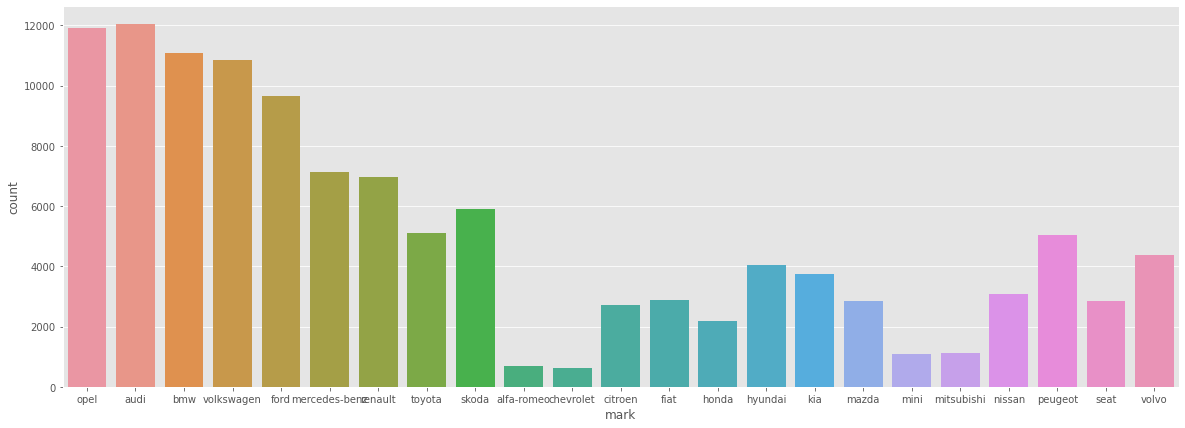

In [9]:
# how much repeat type cars  in the dataset

plt.figure(figsize=(20,7))
sns.countplot(df["mark"])
plt.show()


### The highest 5 Mark cars in the data set
- audi             10 %
- opel             10 %
- bmw              10 %
- volkswagen       9 %
- ford             8 %

- The people there like German cars

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


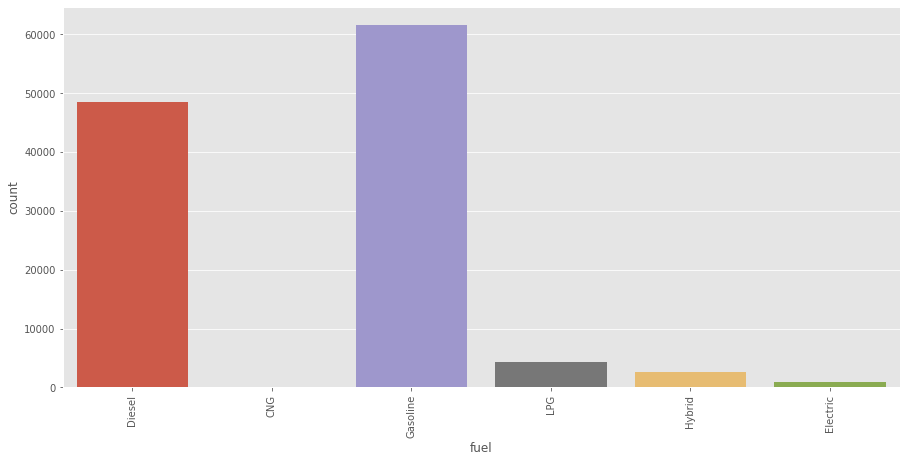

In [10]:
#Fuel
plt.figure(figsize=(15,7))
sns.countplot(df["fuel"])
plt.xticks(rotation=90)
plt.show()

#### The populations using cars working 
- Gasoline
- Diesel 

In [11]:
# let`s show correlation the price and the yeas - using interactive graph  

px.scatter(df,x="year",y="price",animation_frame="mark",color="fuel")


 - When increasing years increasing price

<AxesSubplot:xlabel='vol_engine', ylabel='price'>

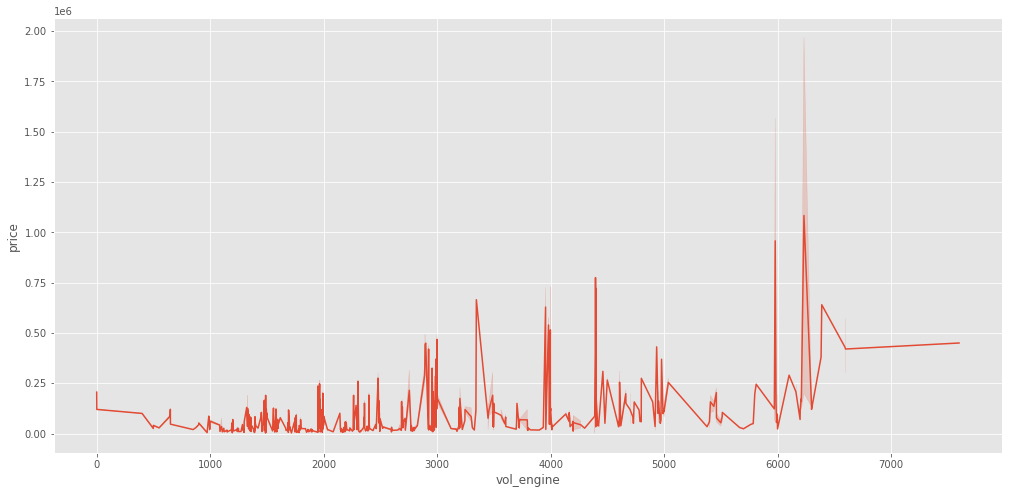

In [12]:
# let see how change the price for this vol_engine  
plt.figure(figsize=(17,8))
sns.lineplot(data=df,x="vol_engine",y="price")

- When increasing engine increasing price , or increasing price with big car 

In [13]:
# let`s make group by mark

group=df.groupby("mark")["price"].mean()
group.sort_values()

mark
citroen           34098.127206
opel              35109.647641
fiat              39326.176389
chevrolet         40287.218750
seat              40455.214185
renault           45034.324541
peugeot           47144.632714
nissan            49635.930664
mitsubishi        51085.781250
honda             51344.852941
ford              51801.098613
toyota            54567.395703
hyundai           54830.428571
mazda             57337.477528
kia               59718.260417
skoda             61684.046365
volkswagen        61800.779591
alfa-romeo        69643.068182
mini              72247.548713
audi             105034.593799
volvo            110734.153741
bmw              122836.902168
mercedes-benz    139316.949271
Name: price, dtype: float64

<AxesSubplot:xlabel='mark'>

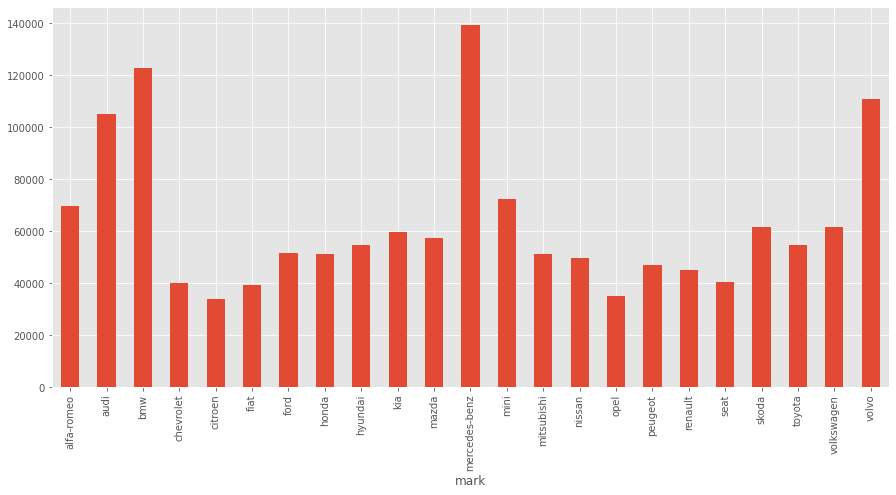

In [14]:
# graph group by

group.plot(kind= "bar", figsize=(15,7))

#### The highest price
- Audi             
- Volvo            
- BMW              
- Mercedes-benz

In [15]:
# let`s make group by fuel

group2=df.groupby("fuel")["price"].mean()
group2.sort_values()

fuel
LPG          27013.299930
CNG          30979.829787
Gasoline     66054.888322
Diesel       71971.990696
Hybrid      169417.107974
Electric    193078.917514
Name: price, dtype: float64

<AxesSubplot:xlabel='fuel'>

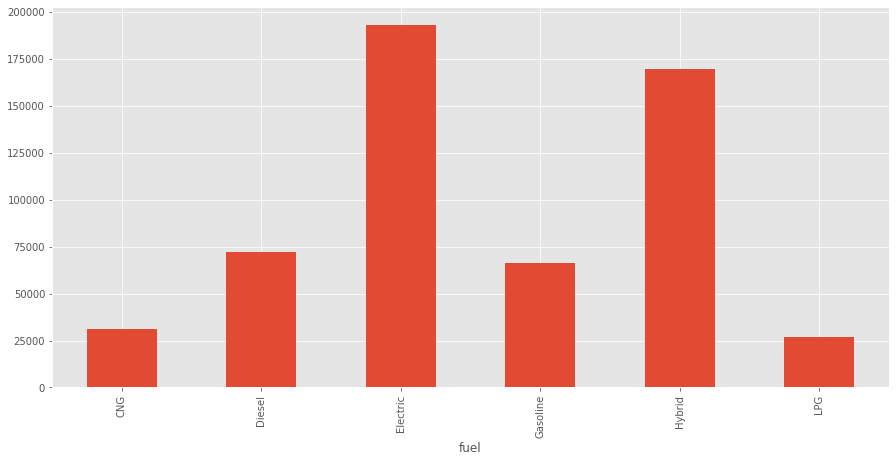

In [16]:
# graph 2 group by- Fuel 

group2.plot(kind= "bar", figsize=(15,7))

### The highest price cars working at :
- Hybrid     
- Electric
### we see above a few people using this cars working Hybrid , Electric , because the high price


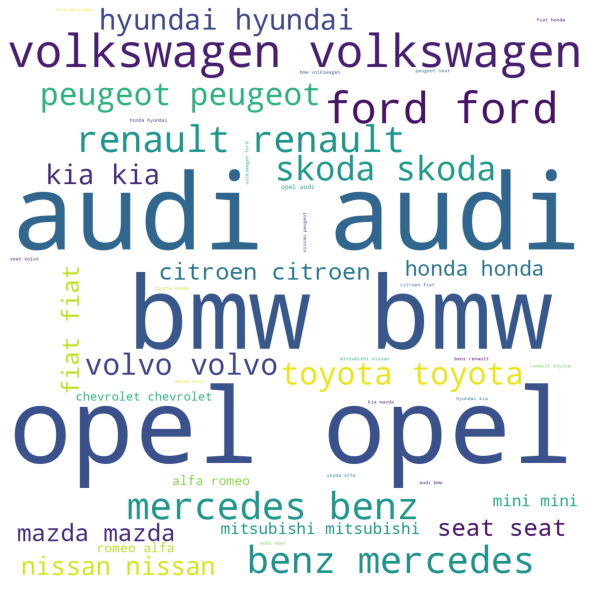

In [17]:
# we see the most word - make cars
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.mark:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

- open / audi / bmw  ...

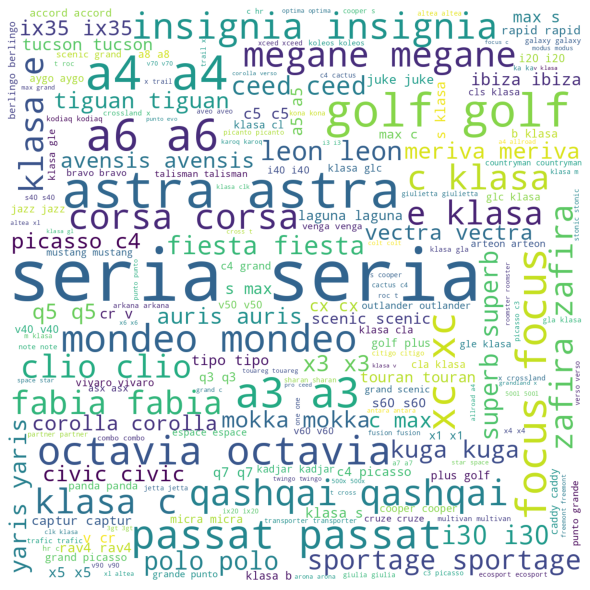

In [18]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.model:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# Analysis Results😃😃😃


The dataset was assembled in January 2022. Data from a well-known car sale site in Poland (which is public). Selenium and request were used for parsing (python of course)

The dataset contains information about the make, model, generation, year of production, mileage, engine type and volume, localization and price

### Notes : ❤️❤️❤️❤️
- The made cars in dataset  form 1945 to 2022 ❤️❤️

- The type car :[  opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz', 'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo]❤️❤️


- When increasing years increasing price ❤️❤️

- When increasing engine increasing price , or increasing price with big car ❤️❤️





### The highest 5 Mark cars in the data set ❤️❤️
- audi 10 %
- opel 10 %
- bmw 10 %
- volkswagen 9 %
- ford 8 %

###### The people there like German cars ❤️❤️❤️❤️


### The populations using cars working
- Gasoline
- Diesel

#### The highest price cars working at :
- Hybrid
- Electric
#### we see above a few people using this cars working Hybrid , Electric , because the high price ❤️❤️❤️❤️



#### The highest price
- Audi
- Volvo
- BMW
- Mercedes-benz



# 2 -Building a Machine Learning Model -  🙄🙄🙄¶

In [19]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  ,BayesianRidge,HuberRegressor,ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [20]:
# show the data set
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [21]:
# Convert categories to numbers  and drop some column


LE=LabelEncoder()
LE.fit(df["mark"])
df["Mark"]=LE.transform(df["mark"])

LE2=LabelEncoder()

LE2.fit(df["fuel"])
df["Fuel"]=LE2.transform(df["fuel"])

df.drop(columns=["mark","model","fuel","city","province"],axis=1 ,inplace=True )#dropping

df.head() # show the data

,year,mileage,vol_engine,price,Mark,Fuel
0,2015,139568,1248,35900,15,1
1,2018,31991,1499,78501,15,1
2,2015,278437,1598,27000,15,1
3,2016,47600,1248,30800,15,1
4,2014,103000,1400,35900,15,0


In [22]:
#Defined X value and y value , and split the data train

X = df.drop(columns="price")           
y = df["price"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (88445, 5)
X Test  :  (29482, 5)
Y Train :  (88445,)
Y Test  :  (29482,)


### Linear Model 🎉🎉🎉

In [23]:
# using the model Linear Regression

LinearRegression_model=LinearRegression(fit_intercept=True,normalize=False,copy_X=True, n_jobs=None)

# fit model

LinearRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LinearRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)) 


Score the X-train with Y-train is :  0.562070934485811
Score the X-test  with Y-test  is :  0.5781919377699047
 Model Evaluation Linear R : mean absolute error is  32979.370204909945
 Model Evaluation Linear R : mean squared  error is  2937840735.841345
 Model Evaluation Linear R : median absolute error is  22696.697392844595
 The Score Linear Regression  0.5781919377699047


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



- Inference : 57 % not working 😷😷😷

### ARD Regression

In [24]:
# using the model ARD Regression

ARDRegression_model=ARDRegression(n_iter=1000,tol=0.001,alpha_1=1e-06,alpha_2=1e-06,lambda_1=1e-06,lambda_2=1e-06,compute_score=False,threshold_lambda=10000.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    verbose=False)

# fit model

ARDRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", ARDRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", ARDRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_predARD=ARDRegression_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_predARD))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_predARD))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_predARD)) 

print(" The Score ARD Regression " ,r2_score(y_test,y_predARD)) 

Score the X-train with Y-train is :  0.5620708863121961
Score the X-test  with Y-test  is :  0.5781843915969975
 Model Evaluation Linear R : mean absolute error is  32977.642149155676
 Model Evaluation Linear R : mean squared  error is  2937893293.9978895
 Model Evaluation Linear R : median absolute error is  22691.349930248223
 The Score ARD Regression  0.5781843915969975


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



- Inference : 57 % not working 😷😷😷

#### Decision Tree Regressor Model 🎉🎉🎉

In [25]:
# using the Decision Tree Regressor Model

DecisionTreeRegressor_model=DecisionTreeRegressor()

# fit model

DecisionTreeRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predDTR=DecisionTreeRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score Decision Tree Regressor model " ,r2_score(y_test,y_predDTR))

Score the X-train with Y-train is :  0.9776059597797885
Score the X-test  with Y-test  is :  0.8516965496172916
 The Score Decision Tree Regressor model  0.8516965496172916


-  Inference : 86 %  working  but the score train 97 % maybe making overfitting 

### K Neighbors Regressor 🎉🎉🎉

In [26]:
# using the K Neighbors Regressor Model

KNeighborsRegressor_model=KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

# fit model

KNeighborsRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predKN=KNeighborsRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score K Neighbors Regressor Model " ,r2_score(y_test,y_predKN)) 

Score the X-train with Y-train is :  0.9776059597797885
Score the X-test  with Y-test  is :  0.8516965496172916
 The Score K Neighbors Regressor Model  0.7772727746178716


- Inference : 77 % working but the score train 97 % maybe making overfitting

### Random Forest Regressor

In [27]:
# using the Random Forest Regressor Model

RandomForestRegressor_model=RandomForestRegressor()

# fit model

RandomForestRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", RandomForestRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", RandomForestRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predRFR=RandomForestRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score Random Forest Regressor Model " ,r2_score(y_test,y_predRFR)) 

Score the X-train with Y-train is :  0.9675548722758265
Score the X-test  with Y-test  is :  0.8973848201233741
 The Score Random Forest Regressor Model  0.8973848201233741


- Inference : 89 % working , the best model 

# Model Selection Results 😃😃😃😃

- The Score Linear Regression 57 %

- The Score ARD Regression 57 %

- The Score Decision Tree Regressor model 86 %

- The Score K Neighbors Regressor Model 77 %

- The Score Random Forest Regressor Model 89 %

### The best model -  Random Forest Regressor  

# Notes 😃😃😃😃

- Thank for reading my analysis and my regression.
- If you any questions or advice me please write in the comment .
- If anyone has a model with a higher percentage, please tell me



# Vote 🤝🤝🤝🤝

- If you liked my work vote me , ❤️❤️❤️❤️

# The End 😃😃😃😃